(24360, 3)
(11340, 3)
Epoch 1/100
8120/8120 [==============================] - 21s 3ms/step - loss: 0.0273
Epoch 2/100
8120/8120 [==============================] - 12s 1ms/step - loss: 0.0124
Epoch 3/100
8120/8120 [==============================] - 11s 1ms/step - loss: 0.0096
Epoch 4/100
8120/8120 [==============================] - 12s 1ms/step - loss: 0.0081
Epoch 5/100
8120/8120 [==============================] - 11s 1ms/step - loss: 0.0062
Epoch 6/100
8120/8120 [==============================] - 11s 1ms/step - loss: 0.0046
Epoch 7/100
8120/8120 [==============================] - 11s 1ms/step - loss: 0.0044
Epoch 8/100
8120/8120 [==============================] - 14s 2ms/step - loss: 0.0042
Epoch 9/100
8120/8120 [==============================] - 11s 1ms/step - loss: 0.0041
Epoch 10/100
8120/8120 [==============================] - 12s 1ms/step - loss: 0.0040
Epoch 11/100
8120/8120 [==============================] - 11s 1ms/step - loss: 0.0040
Epoch 12/100
8120/8120 [=================

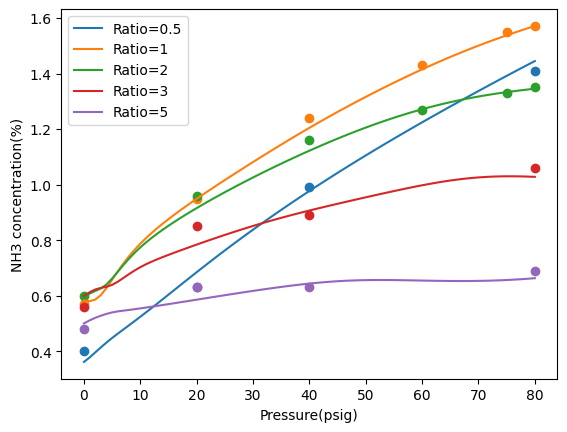

In [ ]:
## Trendline Data
## Input features: Pressure, H2 to N2 ratio
import numpy as np
import pandas as pd
import itertools
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC, RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam

data2 = np.array([[0, 0.5, 0.36],
[20.49, 0.5, 0.69],
[39.18, 0.5, 0.96],
[59.59, 0.5, 1.21],
[79.93, 0.5, 1.43],
[0, 1, 0.58],
[10.24, 1, 0.79],
[20.11, 1, 0.96],
[39.33, 1, 1.23],
[59.44, 1, 1.44],
[75.44, 1, 1.55],
[79.85, 1, 1.57],
[0, 2, 0.60],
[10.09, 2, 0.78],
[20.41, 2, 0.94],
[39.18, 2, 1.15],
[59.51, 2, 1.29],
[75.59, 2, 1.34],
[80, 2, 1.34],
[0, 3, 0.61],
[10.32, 3, 0.71],
[20.56, 3, 0.79],
[39.18, 3, 0.91],
[59.44, 3, 1],
[79.85, 3, 1.03],
[0, 5, 0.51],
[10.32, 5, 0.56],
[20.49, 5, 0.59],
[39.33, 5, 0.65],
[59.66, 5, 0.67],
[79.85, 5, 0.68]])

# Convert data2 into a DataFrame
my_column_names = ['Pressure(psig)','H2 to N2 ratio','Ammonia Concentration(%)']
data2 = pd.DataFrame(data=data2, columns=my_column_names)

data2VariableNames = data2.columns.tolist()
feaColums = data2VariableNames[1:3]
labels = data2VariableNames[3:]

data2Del = data2.drop_duplicates(subset=feaColums,keep='first',inplace=False)
#print(data2Del)

ind_list = [i for i in range(data2Del.shape[0])]
#print(ind_list)

ind_set = list(itertools.combinations(ind_list,2))
#print(ind_set)\

model_smote = SMOTE(k_neighbors=1,random_state=0)

data_smote_all = []
ind_smote_all = []
ind_smote = np.zeros(data2Del.shape[0]-5)
#print(ind_smote)

ind_smote[:2] = 1
#print(ind_smote[:2])
smote_data = []
i = 0

for item in ind_set:
    ind_ = list(item)
    y_smote = np.zeros(data2Del.shape[0])
    y_smote[ind_] = 1
    i +=1
    data_smote_resampled, y_smote_resampled = model_smote.fit_resample(data2Del, y_smote)
    smote_data.append(data_smote_resampled)

# Convert the list to a NumPy array
smote_data = np.array(smote_data)
smote_data = smote_data.reshape(-1, 3)
print(smote_data.shape)

# Taking random 24360 data points
np.random.seed(42)

random_indices = np.random.choice(smote_data.shape[0], size=24360, replace=False)

smote_data_random = smote_data[random_indices, :]

# Convert the array to a list of tuples to preserve the 2D structure
smote_data_tuples = [tuple(row) for row in smote_data_random]

# Storing unique data points
unique_tuples = np.unique(smote_data_tuples, axis=0)

# Convert the unique tuples back to a NumPy array
smote_data_array = np.array(unique_tuples)
print(smote_data_array .shape)
smote_data_feature = smote_data_random[:, :2]
smote_data_label = smote_data_random[:, 2]


## Establishing Neural Network
# define the deep neural network model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='softplus'))
model.add(Dense(128, activation='softplus'))
model.add(Dense(64, activation='softplus'))
model.add(Dense(1, activation='linear'))


# compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=opt)

# train the model on the training set
model.fit(smote_data_feature, smote_data_label, epochs=100, batch_size=3)
history_train = model.fit(smote_data_feature, smote_data_label, epochs=100, batch_size=3)

# Constant values
# Temperature = 320
# Gas_flow_rate = 100

# pressure range with an increment of 1
Pressure_range = range(0, 81, 1)

###############################################################################
Ratio_Exp = 0.5

# Creating array for input features
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=0.5')
plt.scatter([0,20,40,80],[0.4,0.63,0.99,1.41])
plt.xlabel('Pressure(psig)')
plt.ylabel('NH3 concentration(%)')
plt.legend()

###############################################################################
Ratio_Exp = 1
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=1')
plt.scatter([0,20,40,60,75,80],[0.57,0.95,1.24,1.43,1.55,1.57])
plt.legend()
###############################################################################
Ratio_Exp = 2
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=2')
plt.scatter([0,20,40,60,75,80],[0.6,0.96,1.16,1.27,1.33,1.35])
plt.legend()
###############################################################################
Ratio_Exp = 3
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=3')
plt.scatter([0,20,40,80],[0.56,0.85,0.89,1.06])
plt.legend()
###############################################################################
Ratio_Exp = 5
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=5')
plt.scatter([0,20,40,80],[0.48,0.63,0.63,0.69])
plt.legend()


(24360, 3)
(9327, 3)
Epoch 1/100
6667/6667 [==============================] - 9s 1ms/step - loss: 0.0334
Epoch 2/100
6667/6667 [==============================] - 8s 1ms/step - loss: 0.0129
Epoch 3/100
6667/6667 [==============================] - 9s 1ms/step - loss: 0.0104
Epoch 4/100
6667/6667 [==============================] - 10s 2ms/step - loss: 0.0091
Epoch 5/100
6667/6667 [==============================] - 9s 1ms/step - loss: 0.0084
Epoch 6/100
6667/6667 [==============================] - 9s 1ms/step - loss: 0.0072
Epoch 7/100
6667/6667 [==============================] - 8s 1ms/step - loss: 0.0051
Epoch 8/100
6667/6667 [==============================] - 9s 1ms/step - loss: 0.0045
Epoch 9/100
6667/6667 [==============================] - 8s 1ms/step - loss: 0.0043
Epoch 10/100
6667/6667 [==============================] - 8s 1ms/step - loss: 0.0042
Epoch 11/100
6667/6667 [==============================] - 9s 1ms/step - loss: 0.0041
Epoch 12/100
6667/6667 [============================

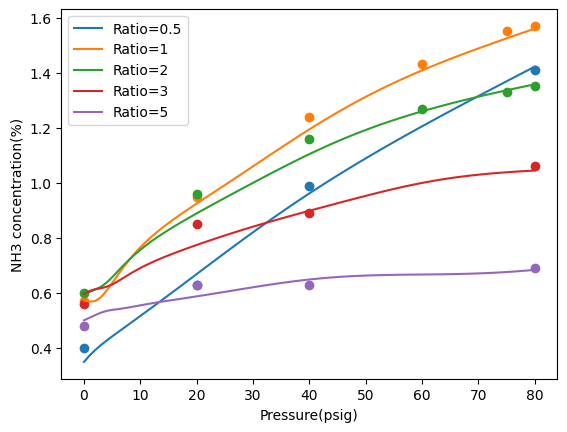

In [ ]:
## Trendline Data
## Input features: Pressure, H2 to N2 ratio
import numpy as np
import pandas as pd
import itertools
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC, RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam

data2 = np.array([[0, 0.5, 0.36],
[20.49, 0.5, 0.69],
[39.18, 0.5, 0.96],
[59.59, 0.5, 1.21],
[79.93, 0.5, 1.43],
[0, 1, 0.58],
[10.24, 1, 0.79],
[20.11, 1, 0.96],
[39.33, 1, 1.23],
[59.44, 1, 1.44],
[75.44, 1, 1.55],
[79.85, 1, 1.57],
[0, 2, 0.60],
[10.09, 2, 0.78],
[20.41, 2, 0.94],
[39.18, 2, 1.15],
[59.51, 2, 1.29],
[75.59, 2, 1.34],
[80, 2, 1.34],
[0, 3, 0.61],
[10.32, 3, 0.71],
[20.56, 3, 0.79],
[39.18, 3, 0.91],
[59.44, 3, 1],
[79.85, 3, 1.03],
[0, 5, 0.51],
[10.32, 5, 0.56],
[20.49, 5, 0.59],
[39.33, 5, 0.65],
[59.66, 5, 0.67],
[79.85, 5, 0.68]])

# Convert data2 into a DataFrame
my_column_names = ['Pressure(psig)','H2 to N2 ratio','Ammonia Concentration(%)']
data2 = pd.DataFrame(data=data2, columns=my_column_names)

data2VariableNames = data2.columns.tolist()
feaColums = data2VariableNames[1:3]
labels = data2VariableNames[3:]

data2Del = data2.drop_duplicates(subset=feaColums,keep='first',inplace=False)
#print(data2Del)

ind_list = [i for i in range(data2Del.shape[0])]
#print(ind_list)

ind_set = list(itertools.combinations(ind_list,2))
#print(ind_set)

model_smote = SMOTE(k_neighbors=1,random_state=0)

data_smote_all = []
ind_smote_all = []
ind_smote = np.zeros(data2Del.shape[0]-5)
#print(ind_smote)

ind_smote[:2] = 1
#print(ind_smote[:2])
smote_data = []
i = 0

for item in ind_set:
    ind_ = list(item)
    y_smote = np.zeros(data2Del.shape[0])
    y_smote[ind_] = 1
    i +=1
    data_smote_resampled, y_smote_resampled = model_smote.fit_resample(data2Del, y_smote)
    smote_data.append(data_smote_resampled)

# Convert the list to a NumPy array
smote_data = np.array(smote_data)
smote_data = smote_data.reshape(-1, 3)
print(smote_data.shape)

# Taking random 20000 data points
np.random.seed(42)

random_indices = np.random.choice(smote_data.shape[0], size=20000, replace=False)

smote_data_random = smote_data[random_indices, :]

# Convert the array to a list of tuples to preserve the 2D structure
smote_data_tuples = [tuple(row) for row in smote_data_random]

# Storing unique data points
unique_tuples = np.unique(smote_data_tuples, axis=0)

# Convert the unique tuples back to a NumPy array
smote_data_array = np.array(unique_tuples)
print(smote_data_array .shape)
smote_data_feature = smote_data_random[:, :2]
smote_data_label = smote_data_random[:, 2]


## Establishing Neural Network
# define the deep neural network model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='softplus'))
model.add(Dense(128, activation='softplus'))
model.add(Dense(64, activation='softplus'))
model.add(Dense(1, activation='linear'))


# compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=opt)

# train the model on the training set
model.fit(smote_data_feature, smote_data_label, epochs=100, batch_size=3)
history_train = model.fit(smote_data_feature, smote_data_label, epochs=100, batch_size=3)

# Constant values
# Temperature = 320
# Gas_flow_rate = 100

# pressure range with an increment of 1
Pressure_range = range(0, 81, 1)

###############################################################################
Ratio_Exp = 0.5

# Creating array for input features
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=0.5')
plt.scatter([0,20,40,80],[0.4,0.63,0.99,1.41])
plt.xlabel('Pressure(psig)')
plt.ylabel('NH3 concentration(%)')
plt.legend()

###############################################################################
Ratio_Exp = 1
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=1')
plt.scatter([0,20,40,60,75,80],[0.57,0.95,1.24,1.43,1.55,1.57])
plt.legend()
###############################################################################
Ratio_Exp = 2
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=2')
plt.scatter([0,20,40,60,75,80],[0.6,0.96,1.16,1.27,1.33,1.35])
plt.legend()
###############################################################################
Ratio_Exp = 3
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=3')
plt.scatter([0,20,40,80],[0.56,0.85,0.89,1.06])
plt.legend()
###############################################################################
Ratio_Exp = 5
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=5')
plt.scatter([0,20,40,80],[0.48,0.63,0.63,0.69])
plt.legend()


(24360, 3)
(7066, 3)
Epoch 1/100
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0430
Epoch 2/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0156
Epoch 3/100
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0128
Epoch 4/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0112
Epoch 5/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0096
Epoch 6/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0086
Epoch 7/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0079
Epoch 8/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0066
Epoch 9/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0053
Epoch 10/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0047
Epoch 11/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0045
Epoch 12/100
5000/5000 [=============================

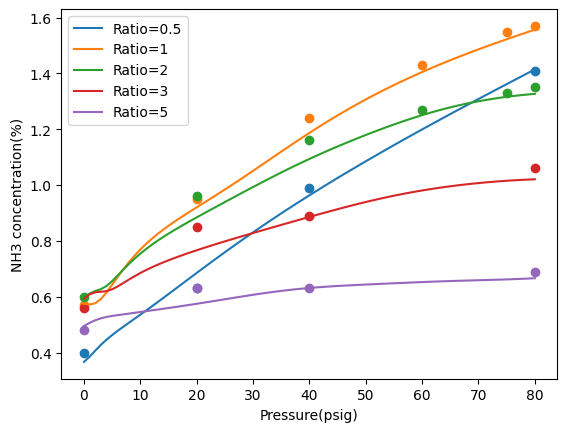

In [ ]:
## Trendline Data
## Input features: Pressure, H2 to N2 ratio
import numpy as np
import pandas as pd
import itertools
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC, RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam

data2 = np.array([[0, 0.5, 0.36],
[20.49, 0.5, 0.69],
[39.18, 0.5, 0.96],
[59.59, 0.5, 1.21],
[79.93, 0.5, 1.43],
[0, 1, 0.58],
[10.24, 1, 0.79],
[20.11, 1, 0.96],
[39.33, 1, 1.23],
[59.44, 1, 1.44],
[75.44, 1, 1.55],
[79.85, 1, 1.57],
[0, 2, 0.60],
[10.09, 2, 0.78],
[20.41, 2, 0.94],
[39.18, 2, 1.15],
[59.51, 2, 1.29],
[75.59, 2, 1.34],
[80, 2, 1.34],
[0, 3, 0.61],
[10.32, 3, 0.71],
[20.56, 3, 0.79],
[39.18, 3, 0.91],
[59.44, 3, 1],
[79.85, 3, 1.03],
[0, 5, 0.51],
[10.32, 5, 0.56],
[20.49, 5, 0.59],
[39.33, 5, 0.65],
[59.66, 5, 0.67],
[79.85, 5, 0.68]])

# Convert data2 into a DataFrame
my_column_names = ['Pressure(psig)','H2 to N2 ratio','Ammonia Concentration(%)']
data2 = pd.DataFrame(data=data2, columns=my_column_names)

data2VariableNames = data2.columns.tolist()
feaColums = data2VariableNames[1:3]
labels = data2VariableNames[3:]

data2Del = data2.drop_duplicates(subset=feaColums,keep='first',inplace=False)
#print(data2Del)

ind_list = [i for i in range(data2Del.shape[0])]
#print(ind_list)

ind_set = list(itertools.combinations(ind_list,2))
#print(ind_set)

model_smote = SMOTE(k_neighbors=1,random_state=0)

data_smote_all = []
ind_smote_all = []
ind_smote = np.zeros(data2Del.shape[0]-5)
#print(ind_smote)

ind_smote[:2] = 1
#print(ind_smote[:2])
smote_data = []
i = 0

for item in ind_set:
    ind_ = list(item)
    y_smote = np.zeros(data2Del.shape[0])
    y_smote[ind_] = 1
    i +=1
    data_smote_resampled, y_smote_resampled = model_smote.fit_resample(data2Del, y_smote)
    smote_data.append(data_smote_resampled)

# Convert the list to a NumPy array
smote_data = np.array(smote_data)
smote_data = smote_data.reshape(-1, 3)
print(smote_data.shape)

# Taking random 15000 data points
np.random.seed(42)

random_indices = np.random.choice(smote_data.shape[0], size=15000, replace=False)

smote_data_random = smote_data[random_indices, :]

# Convert the array to a list of tuples to preserve the 2D structure
smote_data_tuples = [tuple(row) for row in smote_data_random]

# Storing unique data points
unique_tuples = np.unique(smote_data_tuples, axis=0)

# Convert the unique tuples back to a NumPy array
smote_data_array = np.array(unique_tuples)
print(smote_data_array .shape)
smote_data_feature = smote_data_random[:, :2]
smote_data_label = smote_data_random[:, 2]


## Establishing Neural Network
# define the deep neural network model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='softplus'))
model.add(Dense(128, activation='softplus'))
model.add(Dense(64, activation='softplus'))
model.add(Dense(1, activation='linear'))


# compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=opt)

# train the model on the training set
model.fit(smote_data_feature, smote_data_label, epochs=100, batch_size=3)
history_train = model.fit(smote_data_feature, smote_data_label, epochs=100, batch_size=3)

# Constant values
# Temperature = 320
# Gas_flow_rate = 100

# pressure range with an increment of 1
Pressure_range = range(0, 81, 1)

###############################################################################
Ratio_Exp = 0.5

# Creating array for input features
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=0.5')
plt.scatter([0,20,40,80],[0.4,0.63,0.99,1.41])
plt.xlabel('Pressure(psig)')
plt.ylabel('NH3 concentration(%)')
plt.legend()

###############################################################################
Ratio_Exp = 1
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=1')
plt.scatter([0,20,40,60,75,80],[0.57,0.95,1.24,1.43,1.55,1.57])
plt.legend()
###############################################################################
Ratio_Exp = 2
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=2')
plt.scatter([0,20,40,60,75,80],[0.6,0.96,1.16,1.27,1.33,1.35])
plt.legend()
###############################################################################
Ratio_Exp = 3
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=3')
plt.scatter([0,20,40,80],[0.56,0.85,0.89,1.06])
plt.legend()
###############################################################################
Ratio_Exp = 5
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=5')
plt.scatter([0,20,40,80],[0.48,0.63,0.63,0.69])
plt.legend()


(24360, 3)
(4684, 3)
Epoch 1/100
3334/3334 [==============================] - 5s 1ms/step - loss: 0.0162
Epoch 2/100
3334/3334 [==============================] - 5s 1ms/step - loss: 0.0131
Epoch 3/100
3334/3334 [==============================] - 5s 1ms/step - loss: 0.0116
Epoch 4/100
3334/3334 [==============================] - 5s 1ms/step - loss: 0.0100
Epoch 5/100
3334/3334 [==============================] - 5s 1ms/step - loss: 0.0092
Epoch 6/100
3334/3334 [==============================] - 5s 1ms/step - loss: 0.0084
Epoch 7/100
3334/3334 [==============================] - 5s 1ms/step - loss: 0.0079
Epoch 8/100
3334/3334 [==============================] - 5s 2ms/step - loss: 0.0071
Epoch 9/100
3334/3334 [==============================] - 4s 1ms/step - loss: 0.0056
Epoch 10/100
3334/3334 [==============================] - 5s 2ms/step - loss: 0.0047
Epoch 11/100
3334/3334 [==============================] - 5s 1ms/step - loss: 0.0044
Epoch 12/100
3334/3334 [=============================

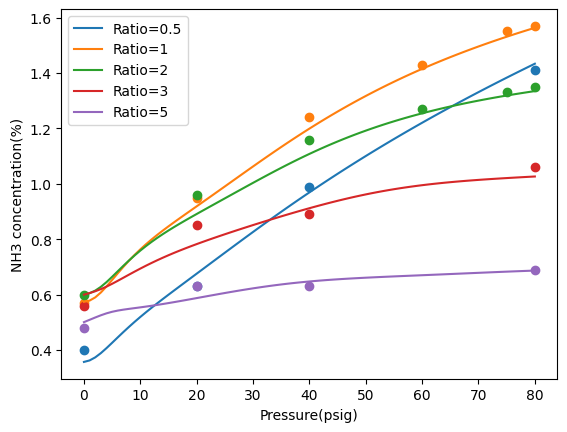

In [ ]:
## Trendline Data
## Input features: Pressure, H2 to N2 ratio
## Taken for conference abstract
import numpy as np
import pandas as pd
import itertools
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC, RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam

data2 = np.array([[0, 0.5, 0.36],
[20.49, 0.5, 0.69],
[39.18, 0.5, 0.96],
[59.59, 0.5, 1.21],
[79.93, 0.5, 1.43],
[0, 1, 0.58],
[10.24, 1, 0.79],
[20.11, 1, 0.96],
[39.33, 1, 1.23],
[59.44, 1, 1.44],
[75.44, 1, 1.55],
[79.85, 1, 1.57],
[0, 2, 0.60],
[10.09, 2, 0.78],
[20.41, 2, 0.94],
[39.18, 2, 1.15],
[59.51, 2, 1.29],
[75.59, 2, 1.34],
[80, 2, 1.34],
[0, 3, 0.61],
[10.32, 3, 0.71],
[20.56, 3, 0.79],
[39.18, 3, 0.91],
[59.44, 3, 1],
[79.85, 3, 1.03],
[0, 5, 0.51],
[10.32, 5, 0.56],
[20.49, 5, 0.59],
[39.33, 5, 0.65],
[59.66, 5, 0.67],
[79.85, 5, 0.68]])

# Convert data2 into a DataFrame
my_column_names = ['Pressure(psig)','H2 to N2 ratio','Ammonia Concentration(%)']
data2 = pd.DataFrame(data=data2, columns=my_column_names)

data2VariableNames = data2.columns.tolist()
feaColums = data2VariableNames[1:3]
labels = data2VariableNames[3:]

data2Del = data2.drop_duplicates(subset=feaColums,keep='first',inplace=False)
#print(data2Del)

ind_list = [i for i in range(data2Del.shape[0])]
#print(ind_list)

ind_set = list(itertools.combinations(ind_list,2))
#print(ind_set)

model_smote = SMOTE(k_neighbors=1,random_state=0)

data_smote_all = []
ind_smote_all = []
ind_smote = np.zeros(data2Del.shape[0]-5)
#print(ind_smote)

ind_smote[:2] = 1
#print(ind_smote[:2])
smote_data = []
i = 0

for item in ind_set:
    ind_ = list(item)
    y_smote = np.zeros(data2Del.shape[0])
    y_smote[ind_] = 1
    i +=1
    data_smote_resampled, y_smote_resampled = model_smote.fit_resample(data2Del, y_smote)
    smote_data.append(data_smote_resampled)

# Convert the list to a NumPy array
smote_data = np.array(smote_data)
smote_data = smote_data.reshape(-1, 3)
print(smote_data.shape)

# Taking random 10000 data points
np.random.seed(42)

random_indices = np.random.choice(smote_data.shape[0], size=10000, replace=False)

smote_data_random = smote_data[random_indices, :]

# Convert the array to a list of tuples to preserve the 2D structure
smote_data_tuples = [tuple(row) for row in smote_data_random]

# Storing unique data points
unique_tuples = np.unique(smote_data_tuples, axis=0)

# Convert the unique tuples back to a NumPy array
smote_data_array = np.array(unique_tuples)
print(smote_data_array .shape)
smote_data_feature = smote_data_random[:, :2]
smote_data_label = smote_data_random[:, 2]


## Establishing Neural Network
# define the deep neural network model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='softplus'))
model.add(Dense(128, activation='softplus'))
model.add(Dense(64, activation='softplus'))
model.add(Dense(1, activation='linear'))


# compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=opt)

# train the model on the training set
model.fit(smote_data_feature, smote_data_label, epochs=100, batch_size=3)
history_train = model.fit(smote_data_feature, smote_data_label, epochs=100, batch_size=3)

# Constant values
# Temperature = 320
# Gas_flow_rate = 100

# pressure range with an increment of 1
Pressure_range = range(0, 81, 1)

###############################################################################
Ratio_Exp = 0.5

# Creating array for input features
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=0.5')
plt.scatter([0,20,40,80],[0.4,0.63,0.99,1.41])
plt.xlabel('Pressure(psig)')
plt.ylabel('NH3 concentration(%)')
plt.legend()

###############################################################################
Ratio_Exp = 1
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=1')
plt.scatter([0,20,40,60,75,80],[0.57,0.95,1.24,1.43,1.55,1.57])
plt.legend()
###############################################################################
Ratio_Exp = 2
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=2')
plt.scatter([0,20,40,60,75,80],[0.6,0.96,1.16,1.27,1.33,1.35])
plt.legend()
###############################################################################
Ratio_Exp = 3
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=3')
plt.scatter([0,20,40,80],[0.56,0.85,0.89,1.06])
plt.legend()
###############################################################################
Ratio_Exp = 5
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=5')
plt.scatter([0,20,40,80],[0.48,0.63,0.63,0.69])
plt.legend()


(24360, 3)
(11340, 3)
Epoch 1/100
3780/3780 [==============================] - 20s 5ms/step - loss: 0.0316
Epoch 2/100
3780/3780 [==============================] - 12s 3ms/step - loss: 0.0131
Epoch 3/100
3780/3780 [==============================] - 9s 2ms/step - loss: 0.0117
Epoch 4/100
3780/3780 [==============================] - 9s 2ms/step - loss: 0.0106
Epoch 5/100
3780/3780 [==============================] - 8s 2ms/step - loss: 0.0095
Epoch 6/100
3780/3780 [==============================] - 9s 2ms/step - loss: 0.0089
Epoch 7/100
3780/3780 [==============================] - 11s 3ms/step - loss: 0.0085
Epoch 8/100
3780/3780 [==============================] - 8s 2ms/step - loss: 0.0082
Epoch 9/100
3780/3780 [==============================] - 9s 2ms/step - loss: 0.0079
Epoch 10/100
3780/3780 [==============================] - 9s 2ms/step - loss: 0.0077
Epoch 11/100
3780/3780 [==============================] - 8s 2ms/step - loss: 0.0072
Epoch 12/100
3780/3780 [=========================

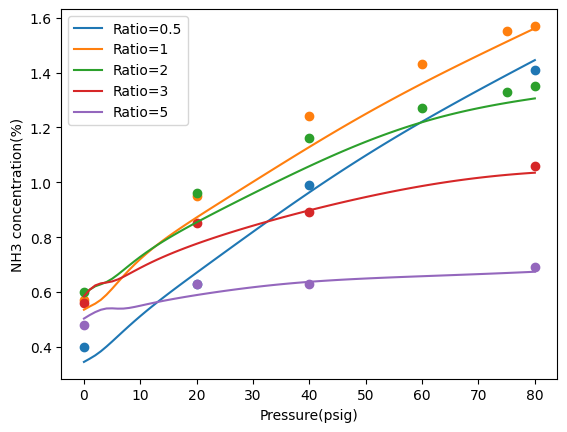

In [ ]:
## Trendline Data
## Input features: Pressure, H2 to N2 ratio
## Taking only unique data points
import numpy as np
import pandas as pd
import itertools
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam

data2 = np.array([[0, 0.5, 0.36],
[20.49, 0.5, 0.69],
[39.18, 0.5, 0.96],
[59.59, 0.5, 1.21],
[79.93, 0.5, 1.43],
[0, 1, 0.58],
[10.24, 1, 0.79],
[20.11, 1, 0.96],
[39.33, 1, 1.23],
[59.44, 1, 1.44],
[75.44, 1, 1.55],
[79.85, 1, 1.57],
[0, 2, 0.60],
[10.09, 2, 0.78],
[20.41, 2, 0.94],
[39.18, 2, 1.15],
[59.51, 2, 1.29],
[75.59, 2, 1.34],
[80, 2, 1.34],
[0, 3, 0.61],
[10.32, 3, 0.71],
[20.56, 3, 0.79],
[39.18, 3, 0.91],
[59.44, 3, 1],
[79.85, 3, 1.03],
[0, 5, 0.51],
[10.32, 5, 0.56],
[20.49, 5, 0.59],
[39.33, 5, 0.65],
[59.66, 5, 0.67],
[79.85, 5, 0.68]])

# Convert data2 into a DataFrame
my_column_names = ['Pressure(psig)','H2 to N2 ratio','Ammonia Concentration(%)']
data2 = pd.DataFrame(data=data2, columns=my_column_names)

data2VariableNames = data2.columns.tolist()
feaColums = data2VariableNames[1:3]
labels = data2VariableNames[3:]

data2Del = data2.drop_duplicates(subset=feaColums,keep='first',inplace=False)
#print(data2Del)

ind_list = [i for i in range(data2Del.shape[0])]
#print(ind_list)

ind_set = list(itertools.combinations(ind_list,2))
#print(ind_set)

model_smote = SMOTE(k_neighbors=1,random_state=0)

data_smote_all = []
ind_smote_all = []
ind_smote = np.zeros(data2Del.shape[0]-5)
#print(ind_smote)

ind_smote[:2] = 1
#print(ind_smote[:2])
smote_data = []
i = 0

for item in ind_set:
    ind_ = list(item)
    y_smote = np.zeros(data2Del.shape[0])
    y_smote[ind_] = 1
    i +=1
    data_smote_resampled, y_smote_resampled = model_smote.fit_resample(data2Del, y_smote)
    smote_data.append(data_smote_resampled)

# Convert the list to a NumPy array
smote_data = np.array(smote_data)
smote_data = smote_data.reshape(-1, 3)
print(smote_data.shape)


# Convert the array to a list of tuples to preserve the 2D structure
smote_data_tuples = [tuple(row) for row in smote_data]

# Storing unique data points
unique_tuples = np.unique(smote_data_tuples, axis=0)

# Convert the unique tuples back to a NumPy array
smote_data_array = np.array(unique_tuples)
print(smote_data_array .shape)
smote_data_feature = smote_data_array[:, :2]
smote_data_label = smote_data_array[:, 2]


## Establishing Neural Network
# define the deep neural network model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='softplus'))
model.add(Dense(128, activation='softplus'))
model.add(Dense(64, activation='softplus'))
model.add(Dense(1, activation='linear'))


# compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=opt)

# train the model on the training set
model.fit(smote_data_feature, smote_data_label, epochs=100, batch_size=3)
history_train = model.fit(smote_data_feature, smote_data_label, epochs=100, batch_size=3)

# Constant values
# Temperature = 320
# Gas_flow_rate = 100

# pressure range with an increment of 1
Pressure_range = range(0, 81, 1)

###############################################################################
Ratio_Exp = 0.5

# Creating array for input features
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=0.5')
plt.scatter([0,20,40,80],[0.4,0.63,0.99,1.41])
plt.xlabel('Pressure(psig)')
plt.ylabel('NH3 concentration(%)')
plt.legend()

###############################################################################
Ratio_Exp = 1
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=1')
plt.scatter([0,20,40,60,75,80],[0.57,0.95,1.24,1.43,1.55,1.57])
plt.legend()
###############################################################################
Ratio_Exp = 2
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=2')
plt.scatter([0,20,40,60,75,80],[0.6,0.96,1.16,1.27,1.33,1.35])
plt.legend()
###############################################################################
Ratio_Exp = 3
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=3')
plt.scatter([0,20,40,80],[0.56,0.85,0.89,1.06])
plt.legend()
###############################################################################
Ratio_Exp = 5
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=5')
plt.scatter([0,20,40,80],[0.48,0.63,0.63,0.69])
plt.legend()




(24360, 3)
(11340, 3)
Epoch 1/100
3780/3780 [==============================] - 17s 4ms/step - loss: 0.2040
Epoch 2/100
3780/3780 [==============================] - 9s 2ms/step - loss: 0.0159
Epoch 3/100
3780/3780 [==============================] - 7s 2ms/step - loss: 0.0147
Epoch 4/100
3780/3780 [==============================] - 6s 2ms/step - loss: 0.0137
Epoch 5/100
3780/3780 [==============================] - 7s 2ms/step - loss: 0.0126
Epoch 6/100
3780/3780 [==============================] - 6s 2ms/step - loss: 0.0116
Epoch 7/100
3780/3780 [==============================] - 7s 2ms/step - loss: 0.0108
Epoch 8/100
3780/3780 [==============================] - 6s 2ms/step - loss: 0.0102
Epoch 9/100
3780/3780 [==============================] - 8s 2ms/step - loss: 0.0097
Epoch 10/100
3780/3780 [==============================] - 6s 2ms/step - loss: 0.0095
Epoch 11/100
3780/3780 [==============================] - 7s 2ms/step - loss: 0.0091
Epoch 12/100
3780/3780 [===========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


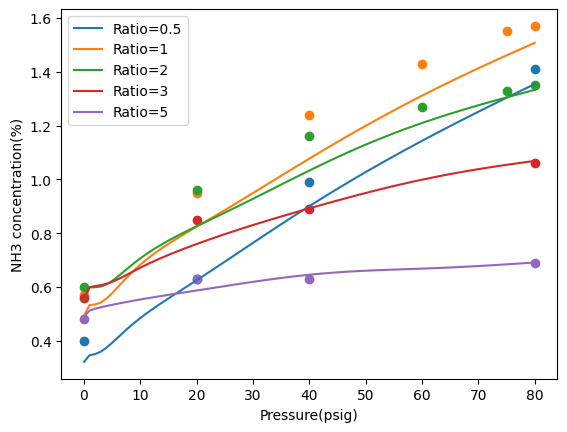

In [ ]:
## Trendline Data
## Input features: Pressure, H2 to N2 ratio
import numpy as np
import pandas as pd
import itertools
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC, RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam

data2 = np.array([[0, 0.5, 0.36],
[20.49, 0.5, 0.69],
[39.18, 0.5, 0.96],
[59.59, 0.5, 1.21],
[79.93, 0.5, 1.43],
[0, 1, 0.58],
[10.24, 1, 0.79],
[20.11, 1, 0.96],
[39.33, 1, 1.23],
[59.44, 1, 1.44],
[75.44, 1, 1.55],
[79.85, 1, 1.57],
[0, 2, 0.60],
[10.09, 2, 0.78],
[20.41, 2, 0.94],
[39.18, 2, 1.15],
[59.51, 2, 1.29],
[75.59, 2, 1.34],
[80, 2, 1.34],
[0, 3, 0.61],
[10.32, 3, 0.71],
[20.56, 3, 0.79],
[39.18, 3, 0.91],
[59.44, 3, 1],
[79.85, 3, 1.03],
[0, 5, 0.51],
[10.32, 5, 0.56],
[20.49, 5, 0.59],
[39.33, 5, 0.65],
[59.66, 5, 0.67],
[79.85, 5, 0.68]])

# Convert data2 into a DataFrame
my_column_names = ['Pressure(psig)','H2 to N2 ratio','Ammonia Concentration(%)']
data2 = pd.DataFrame(data=data2, columns=my_column_names)

data2VariableNames = data2.columns.tolist()
feaColums = data2VariableNames[1:3]
labels = data2VariableNames[3:]

data2Del = data2.drop_duplicates(subset=feaColums,keep='first',inplace=False)
#print(data2Del)

ind_list = [i for i in range(data2Del.shape[0])]
#print(ind_list)

ind_set = list(itertools.combinations(ind_list,2))
#print(ind_set)\

model_smote = SMOTE(k_neighbors=1,random_state=0)

data_smote_all = []
ind_smote_all = []
ind_smote = np.zeros(data2Del.shape[0]-5)
#print(ind_smote)

ind_smote[:2] = 1
#print(ind_smote[:2])
smote_data = []
i = 0

for item in ind_set:
    ind_ = list(item)
    y_smote = np.zeros(data2Del.shape[0])
    y_smote[ind_] = 1
    i +=1
    data_smote_resampled, y_smote_resampled = model_smote.fit_resample(data2Del, y_smote)
    smote_data.append(data_smote_resampled)

# Convert the list to a NumPy array
smote_data = np.array(smote_data)
smote_data = smote_data.reshape(-1, 3)
print(smote_data.shape)

# Taking random 24360 data points
np.random.seed(42)

random_indices = np.random.choice(smote_data.shape[0], size=24360, replace=False)

smote_data_random = smote_data[random_indices, :]

# Convert the array to a list of tuples to preserve the 2D structure
smote_data_tuples = [tuple(row) for row in smote_data_random]

# Storing unique data points
unique_tuples = np.unique(smote_data_tuples, axis=0)

# Convert the unique tuples back to a NumPy array
smote_data_array = np.array(unique_tuples)
print(smote_data_array .shape)
smote_data_feature = smote_data_array[:, :2]
smote_data_label = smote_data_array[:, 2]


## Establishing Neural Network
# define the deep neural network model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='softplus'))
model.add(Dense(128, activation='softplus'))
model.add(Dense(64, activation='softplus'))
model.add(Dense(1, activation='linear'))


# compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=opt)

# train the model on the training set
model.fit(smote_data_feature, smote_data_label, epochs=100, batch_size=3)
history_train = model.fit(smote_data_feature, smote_data_label, epochs=100, batch_size=3)

# Constant values
# Temperature = 320
# Gas_flow_rate = 100

# pressure range with an increment of 1
Pressure_range = range(0, 81, 1)

###############################################################################
Ratio_Exp = 0.5

# Creating array for input features
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=0.5')
plt.scatter([0,20,40,80],[0.4,0.63,0.99,1.41])
plt.xlabel('Pressure(psig)')
plt.ylabel('NH3 concentration(%)')
plt.legend()

###############################################################################
Ratio_Exp = 1
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=1')
plt.scatter([0,20,40,60,75,80],[0.57,0.95,1.24,1.43,1.55,1.57])
plt.legend()
###############################################################################
Ratio_Exp = 2
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=2')
plt.scatter([0,20,40,60,75,80],[0.6,0.96,1.16,1.27,1.33,1.35])
plt.legend()
###############################################################################
Ratio_Exp = 3
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=3')
plt.scatter([0,20,40,80],[0.56,0.85,0.89,1.06])
plt.legend()
###############################################################################
Ratio_Exp = 5
Combined_array = []

for Pressure in Pressure_range:
    Combined_array.append([Pressure, Ratio_Exp])

z_pred = model.predict(Combined_array)

# Extract pressure, ratio, and temperature from Combined_array
pressure = [row[0] for row in Combined_array]
ratio = [row[1] for row in Combined_array]

# Create 2D figure
fig = plt.plot(pressure, z_pred, label='Ratio=5')
plt.scatter([0,20,40,80],[0.48,0.63,0.63,0.69])
plt.legend()

# Save the model for a Keras HDF5 model
model.save('my_modelP.h5')